In [1]:
from IPython.core.display import HTML, Image
css_file = 'style.css'
HTML(open(css_file, 'r').read())

### Library import

In [2]:
from sympy import init_printing, Matrix, symbols, eye, Rational
init_printing()

# Matrix multiplication, inverse and transpose

## Multiplying matrices

In this section we approach matrix multiplication on four ways.  Each method provides its own unique insight into the process of multiplication.  We also take a look at _block multiplication_, where a matrix can be _broken up_ into specifically sized blocks that make multiplication easier.

### Method 1

Consider multiplying matrices $A$ and $B$ to result in $C$. We have already seen that the column size of the first must equal the row size of the second, $A_{n \times m} B_{m \times p} = C_{n \times p}$.

Every element in $C$ (with a row value of $i$ and a column value of $j$) is the dot product of the corresponding row vector in $A$ and the column vector in $B$.  In (1) we take the dot product of row `2` in the first matrix and column `1` in the second matrix to get $C_{21}$.

$$ { \begin{bmatrix} \cdots  & \cdots  & \cdots  \\ 3 & 2 & -1 \\ \cdots  & \cdots  & \cdots  \\ \cdots  & \cdots  & \cdots  \end{bmatrix} }_{ 4\times 3 }{ \begin{bmatrix} 1 & \vdots  \\ 2 & \vdots  \\ 1 & \vdots  \end{bmatrix} }_{ 3\times 2 }={ \begin{bmatrix} { c }_{ 11 } & { c }_{ 12 } \\ \left( 3\times 1 \right) +\left( 2\times 2 \right) +\left( -1\times 1 \right)  & { c }_{ 22 } \\ { c }_{ 31 } & { c }_{ 32 } \\ { c }_{ 41 } & { c }_{ 42 } \end{bmatrix} }_{ 4\times 2 } \tag{1}$$

### Method 2

Here we are concerned with the columns of $B$.  We note that each column in $C$ is the result of the matrix $A$ times the corresponding column in $B$.  In this example, it would be akin to a matrix multiplied by a vector $A \underline{x} = \underline{b}$.  $B$ is then made up from four column vectors.

### Method 3

Here every row in $A$ produces the same numbered row in $C$ by multiplying it with the matrix $B$.  The rows of $C$ are linear combinations of $B$.

### Method 4

In method 1 we looked at $\text{row}_A \times \text{col}_B$, which produced a single number in $C$.  What if we did $\text{col} \times \text{row}$?

The size of a column in $A$ might be written as $r_A \times 1$ and a row in $B$ as $1 \times s_B$.  The result in $C$ would then be $r_A \times s_B$.  Let's use `sympy` to investigate a simple example.  Here we have $A_{3 \times 1}$ and $B_{1 \times 2}$, with $C_{3 \times 2}$.

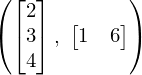

In [6]:
A = Matrix([[2], [3], [4]])
B = Matrix([[1, 6]])
A, B

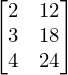

In [8]:
C = A * B
C

So in method 4, for the example below, $C$ is the sum of *the columns of* $A$ times *the rows of* $B$.

$$ \begin{bmatrix} { a }_{ 11 } & { a }_{ 12 } \\ { a }_{ 21 } & { a }_{ 22 } \\ { a }_{ 31 } & { a }_{ 32 } \end{bmatrix}\begin{bmatrix} { b }_{ 11 } & { b }_{ 12 } \\ b_{ 21 } & { b }_{ 22 } \end{bmatrix}=\begin{bmatrix} { a }_{ 11 } \\ { a }_{ 21 } \\ { a }_{ 31 } \end{bmatrix}\begin{bmatrix} { b }_{ 11 } & { b }_{ 12 } \end{bmatrix}+\begin{bmatrix} { a }_{ 12 } \\ { a }_{ 22 } \\ { a }_{ 32 } \end{bmatrix}\begin{bmatrix} { b }_{ 21 } & { b }_{ 22 } \end{bmatrix}  \tag{2}$$

### Block multiplication

This is in essence, a combination of the above.  We do the following:  
+ Both $A$ and $B$ can be broken into block of sizes that allow for multiplication

We see an example of this in (3).

$$ \begin{bmatrix} { A }_{ 1 } & { A }_{ 2 } \\ { A }_{ 3 } & { A }_{ 4 } \end{bmatrix}\begin{bmatrix} { B }_{ 1 } & { B }_{ 2 } \\ { B }_{ 3 } & { B }_{ 4 } \end{bmatrix}=\begin{bmatrix} { A }_{ 1 }{ B }_{ 1 }+{ A }_{ 2 }{ B }_{ 3 } & { A }_{ 1 }{ B }_{ 2 }+{ A }_{ 2 }{ B }_{ 4 } \\ { A }_{ 3 }{ B }_{ 1 }+{ A }_{ 4 }{ B }_{ 3 } & { A }_{ 3 }{ B }_{ 2 }+{ A }_{ 4 }{ B }_{ 4 } \end{bmatrix} \tag{3}$$

## Inverses

W e know by now that **if** the inverse of a matrix $A$ exists then $A^{-1} A = I$, the identity matrix.  This is a _left inverse_, but what about a _right inverse_, $A A^{-1}$?  This is also equal to the identity matrix (given that $A$ is invertible).  Invertible matrices are also called *non-singular* matrices.

This brings the question: "_What is a non-invertible matrix?_".  Non-invertible matrices are called *singular* matrices.  An example is shown in (4).

$$ \begin{bmatrix}1&3\\2&6\end{bmatrix} \tag{4}$$

Note how the elements of row `2` are just $2$ times the elements in row `1`.  The elements of row `2` are linear combinations of the elements in row `1`.  The same go for the columns, the first being a linear combination of the second, multiplying each element by $3$.  More profoundly, note that you could find a column vector $\underline{x}$ such that $A \times \underline{x}= \underline{0}$.

In (5) below we see that $3$ times column `1` in $A$ plus $-1$ times column `2` gives *nothing*, the zero vector.

$$ \begin{bmatrix}1&3\\2&6\end{bmatrix}\begin{bmatrix}3\\-1\end{bmatrix}=\begin{bmatrix}0\\0\end{bmatrix} \tag{5}$$

Let's construct as example, shown in (6) below as $A A^{-1} = I$ (given that $A^{-1}$ exists).

$$ \begin{bmatrix} 1 & 3 \\ 2 & 7 \end{bmatrix}\begin{bmatrix} a & c \\ b & d \end{bmatrix}=\begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix} \tag{6}$$

In essence, we have to solve two systems.  $A$ times column `1` of $A^{-1}$ is column `1` of $I$.  This is the Gauss-Jordan idea of solving two systems at once.

$$ \begin{bmatrix} 1 & 3 \\ 2 & 7 \end{bmatrix}\begin{bmatrix} a \\ b \end{bmatrix}=\begin{bmatrix} 1 \\ 0 \end{bmatrix}\\ \begin{bmatrix} 1 & 3 \\ 2 & 7 \end{bmatrix}\begin{bmatrix} c \\ d \end{bmatrix}=\begin{bmatrix} 0 \\ 1 \end{bmatrix} \tag{7}$$

This will give us the two columns of $I$.  We proceed by creating an augmented matrix of the coefficients (note carefully!).

$$ \begin{bmatrix} 1 & 3 & 1 & 0 \\ 2 & 7 & 0 & 1 \end{bmatrix} \tag{8}$$

Now we use elementary row operations to reduced row-echelon form (leading $1$<sup>'s</sup> in the pivot positions, with $0$<sup>'s</sup> below and above each).

$$ \begin{bmatrix} 1 & 3 & 1 & 0 \\ 2 & 7 & 0 & 1 \end{bmatrix}\rightarrow \begin{bmatrix} 1 & 3 & 1 & 0 \\ 0 & 1 & -2 & 1 \end{bmatrix}\rightarrow \begin{bmatrix} 1 & 0 & 7 & -3 \\ 0 & 1 & -2 & 1 \end{bmatrix} \tag{9}$$

We now read off the two columns of $A^{-1}$.

 $$ \begin{bmatrix}7&-3\\-2&1\end{bmatrix} \tag{10}$$

## Example problems


### Example problem 1

Find the conditions on $a$ and $b$ that makes the matrix $A$ invertible and find $A^{-1}$.|

$$ A=\begin{bmatrix} a & b & b \\ a & a & b \\ a & a & a \end{bmatrix} \tag{11} $$

#### Solution

1. A matrix is singular (non-invertible) if we have a row or column of zeros, so $a \ne 0$
2. We can also not have similar columns, so $a \ne b$

Using Gauss-Jordan elimination we will have the following.



$$ \begin{bmatrix} a & b & b & 1 & 0 & 0 \\ a & a & b & 0 & 1 & 0 \\ a & a & a & 0 & 0 & 1 \end{bmatrix}\rightarrow \begin{bmatrix} a & b & b & 1 & 0 & 0 \\ 0 & a-b & 0 & -1 & 1 & 0 \\ 0 & a-b & a-b & -1 & 0 & 1 \end{bmatrix}\rightarrow \begin{bmatrix} a & b & b & 1 & 0 & 0 \\ 0 & a-b & 0 & -1 & 1 & 0 \\ 0 & 0 & a-b & 0 & -1 & 1 \end{bmatrix}\\ \rightarrow \begin{bmatrix} a & b & b & 1 & 0 & 0 \\ 0 & \frac { a-b }{ a-b }  & 0 & \frac { -1 }{ a-b }  & \frac { 1 }{ a-b }  & 0 \\ 0 & 0 & \frac { a-b }{ a-b }  & 0 & \frac { -1 }{ a-b }  & \frac { 1 }{ a-b }  \end{bmatrix}\rightarrow \begin{bmatrix} a & b & b & 1 & 0 & 0 \\ 0 & 1 & 0 & \frac { -1 }{ a-b }  & \frac { 1 }{ a-b }  & 0 \\ 0 & 0 & 1 & 0 & \frac { -1 }{ a-b }  & \frac { 1 }{ a-b }  \end{bmatrix}\\ \rightarrow \begin{bmatrix} a & b & 0 & 1 & \frac { 1 }{ a-b } \left( b \right)  & -\frac { 1 }{ a-b } \left( b \right)  \\ 0 & 1 & 0 & \frac { -1 }{ a-b }  & \frac { 1 }{ a-b }  & 0 \\ 0 & 0 & 1 & 0 & \frac { -1 }{ a-b }  & \frac { 1 }{ a-b }  \end{bmatrix}\rightarrow \begin{bmatrix} a & 0 & 0 & 1+\frac { b }{ a-b }  & 0 & -\frac { 1 }{ a-b } \left( b \right)  \\ 0 & 1 & 0 & \frac { -1 }{ a-b }  & \frac { 1 }{ a-b }  & 0 \\ 0 & 0 & 1 & 0 & \frac { -1 }{ a-b }  & \frac { 1 }{ a-b }  \end{bmatrix}\\ \rightarrow \begin{bmatrix} 1 & 0 & 0 & \frac { 1 }{ a-b }  & 0 & -\frac { 1 }{ a\left( a-b \right)  } \left( b \right)  \\ 0 & 1 & 0 & \frac { -1 }{ a-b }  & \frac { 1 }{ a-b }  & 0 \\ 0 & 0 & 1 & 0 & \frac { -1 }{ a-b }  & \frac { 1 }{ a-b }  \end{bmatrix}\\ { A }^{ -1 }=\frac { 1 }{ a-b } \begin{bmatrix} 1 & 0 & \frac { -b }{ a }  \\ -1 & 1 & 0 \\ 0 & -1 & 1 \end{bmatrix} \tag{12}$$

If we were to construct this matrix using `sympy` and invert it using the `.inv()` method, we can deduce our findings through simple algebra, i.e. $a \ne b$, $a \ne 0$.

In [9]:
a, b = symbols('a b')

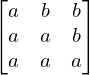

In [11]:
A = Matrix([[a, b, b], [a, a, b], [a, a, a]])
A

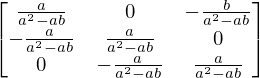

In [12]:
A.inv()